<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
<center>
Авторы материала: Юрий Кашницкий, программист-исследователь Mail.Ru Group, и Мария Сумарокова, старший эксперт по аналитике VimpelCom  <br> 

Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала

# <center>Домашнее задание № 2. <br> Визуальный анализ данных о публикациях на Хабрахабре</center>


In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

## Загрузка и знакомство с данными

Для работы вам понадобятся предобработанные данные нашего учебного конкурса на kaggle [«Прогноз популярности статьи на Хабре»](https://www.kaggle.com/c/howpop-habrahabr-favs).

In [2]:
df = pd.read_csv('howpop_train.csv')

In [3]:
df.shape

(134137, 17)

In [4]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


Избавимся сразу от переменных, названия которых заканчиваются на `_lognorm` (нужны для соревнования на Kaggle). Выберем их с помощью `filter()` и удалим `drop`-ом:

In [5]:
df.drop(filter(lambda c: c.endswith('_lognorm'), df.columns), 
        axis = 1,       # axis = 1: столбцы 
        inplace = True) # избавляет от необходимости сохранять датасет

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [7]:
df.describe(include = ['object', 'bool'] # бинарные и категориальные переменные
           ).T

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/post/299322/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [8]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

Столбец **`published`** (время публикации) содержит строки. Чтобы мы могли работать с этими данными как с датой/временем публикации, приведём их к типу `datetime`:

In [9]:
print(df.published.dtype)
df['published'] = pd.to_datetime(df.published, yearfirst = True)
print(df.published.dtype)

object
datetime64[ns]


Создадим несколько столбцов на основе данных о времени публикации:

In [10]:
df['year'] = [d.year for d in df.published]
df['month'] = [d.month for d in df.published]

df['dayofweek'] = [d.isoweekday() for d in df.published]
df['hour'] = [d.hour for d in df.published]

In [69]:
df.head()

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,dayofweek,hour
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,2008,1,2,18
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,2008,1,2,18
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,2008,1,2,18
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,2008,1,3,1
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,2008,1,3,14


-----
Теперь Ваша очередь. В каждом пункте предлагается построить картинку и с ее помощью ответить на вопрос в [форме](https://docs.google.com/forms/d/e/1FAIpQLSf3b5OG8zX_nLQBQ-t20c6M5Auz-VUL-yxj8Fm9_o_XWDBTrg/viewform?c=0&w=1). Конечно, можно попытаться ответить на все вопросы только с Pandas, без картинок, но мы советуем Вам потренироваться строить (красивые) визуализации.   

## 1\. В каком месяце (и какого года) было больше всего публикаций?

* март 2016
* март 2015
* апрель 2015
* апрель 2016

In [11]:
df_post = df.groupby(['year','month'], as_index=False)[['post_id']].count()
df_post.head()

,year,month,post_id
0,2008,1,435
1,2008,2,496
2,2008,3,545
3,2008,4,597
4,2008,5,635


In [20]:
df_post['date'] = df_post['year'].map(str) + '-' + df_post['month'].map(str)

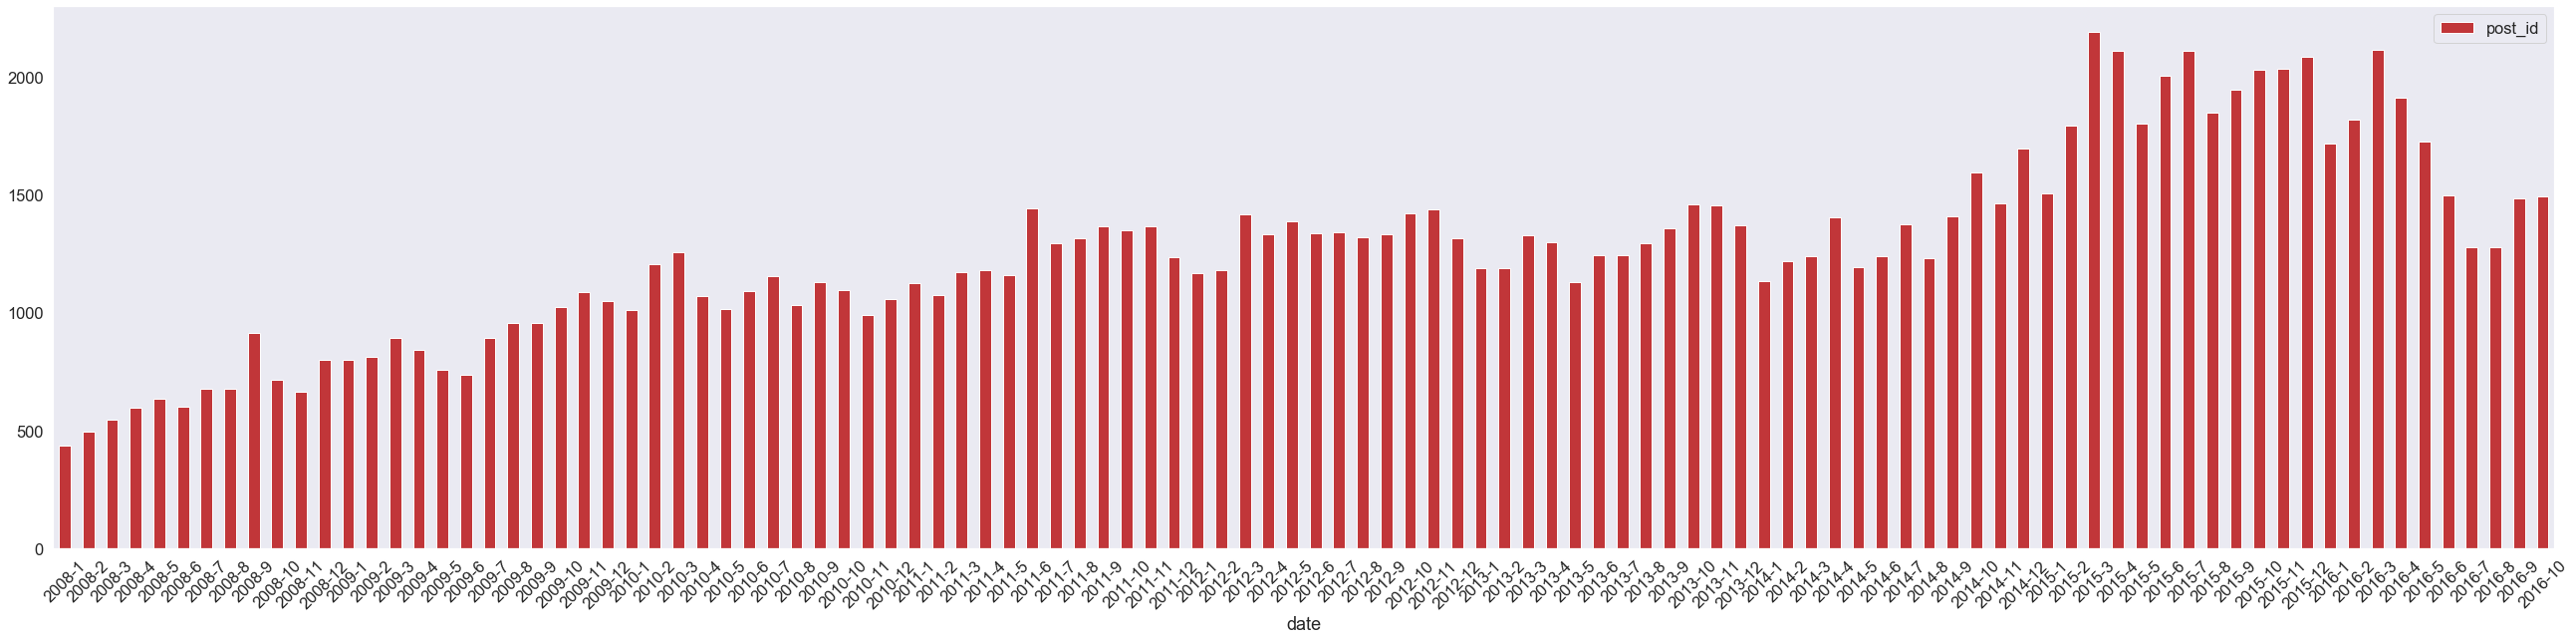

In [26]:
df_post.plot('date', 'post_id', kind='bar', rot=45, figsize=(45,10))

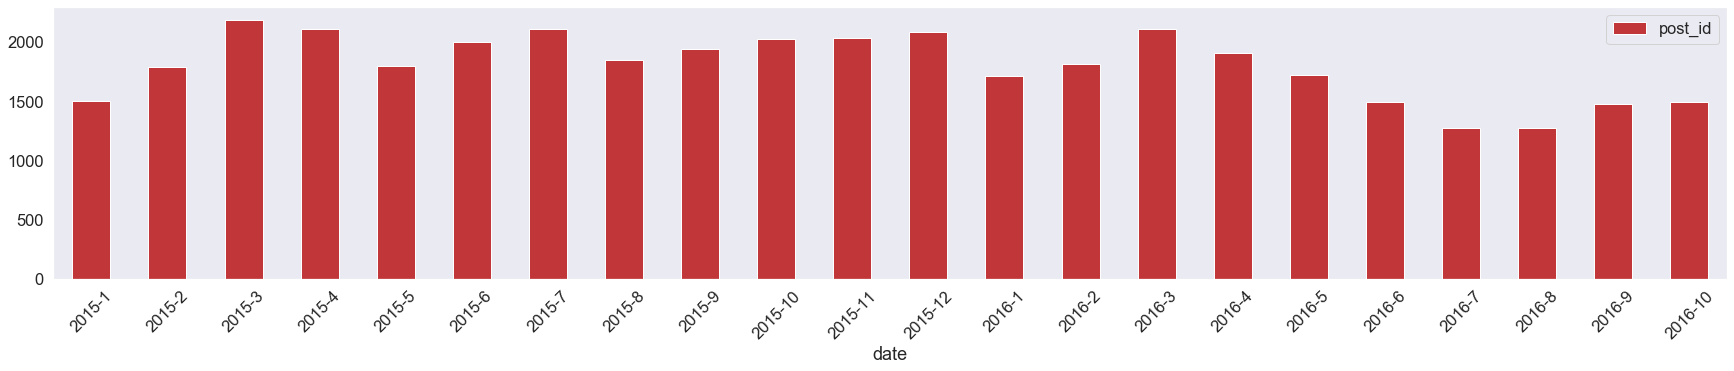

In [32]:
df_post[df_post['year'] > 2014].plot('date', 'post_id', kind='bar', rot=45, figsize=(30,5))

In [63]:
df_post[df_post['post_id'] == df_post['post_id'].max()]['date'].values[0]

'2015-3'

In [68]:
df_post.loc[df_post['post_id'] == df_post['post_id'].max(), 'date'].values[0]

'2015-3'

## 2\. Проанализируйте публикации в месяце из предыдущего вопроса

Выберите один или несколько вариантов:

* Один или несколько дней сильно выделяются из общей картины
* На хабре _всегда_ больше статей, чем на гиктаймсе
* По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей

Подсказки: постройте график зависимости числа публикаций от дня; используйте параметр `hue`; не заморачивайтесь сильно с ответами и не ищите скрытого смысла :)

In [86]:
df_post = df.copy()

In [87]:
df_post['day'] = [d.day for d in df_post.published]

In [92]:
df_post.groupby(['year', 'month', 'day'], as_index=False)[['post_id']].count()

,year,month,day,post_id
0,2008,1,1,3
1,2008,1,2,3
2,2008,1,3,4
3,2008,1,4,14
4,2008,1,5,4
...,...,...,...,...
3221,2016,10,27,58
3222,2016,10,28,53
3223,2016,10,29,14
3224,2016,10,30,27


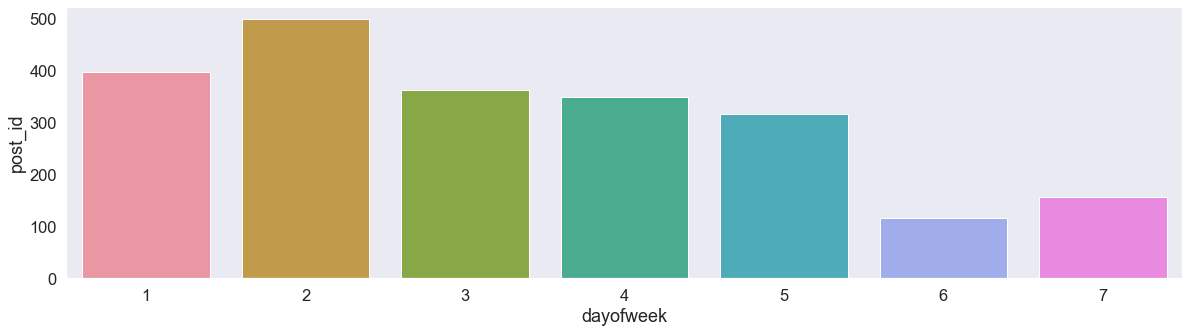

In [125]:
df_week = df_post[(df_post['year'].isin(['2015'])) & (df_post['month'].isin(['3']))].groupby(['dayofweek'], as_index=False)[['post_id']].count()
plt.figure(figsize=(20,5))
sns.barplot(x="dayofweek", y="post_id", data=df_week)

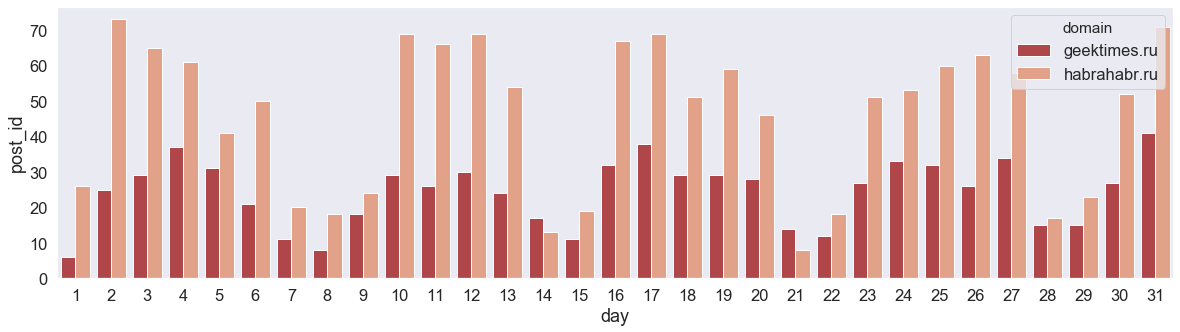

In [126]:
df_day = df_post[(df_post['year'].isin(['2015'])) & (df_post['month'].isin(['3']))].groupby(['day', 'domain'], as_index=False)[['post_id']].count()
plt.figure(figsize=(20,5))
sns.barplot(x="day", y="post_id", hue='domain', data=df_day)

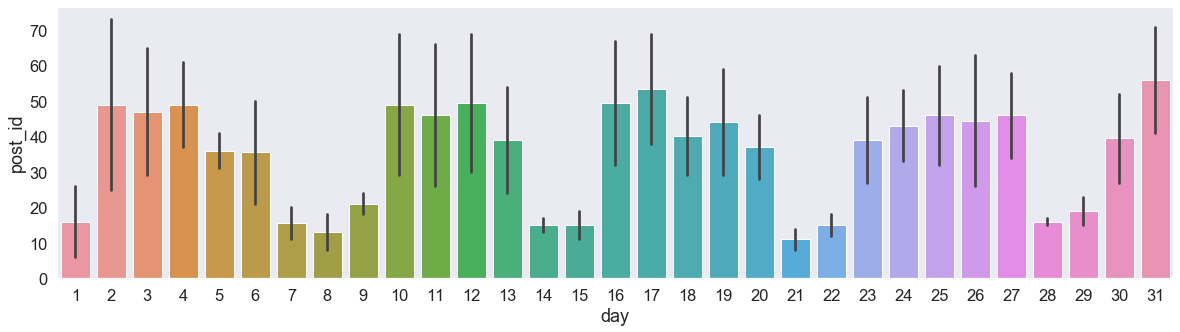

In [128]:
plt.figure(figsize=(20,5))
sns.barplot(x="day", y="post_id", data=df_day)

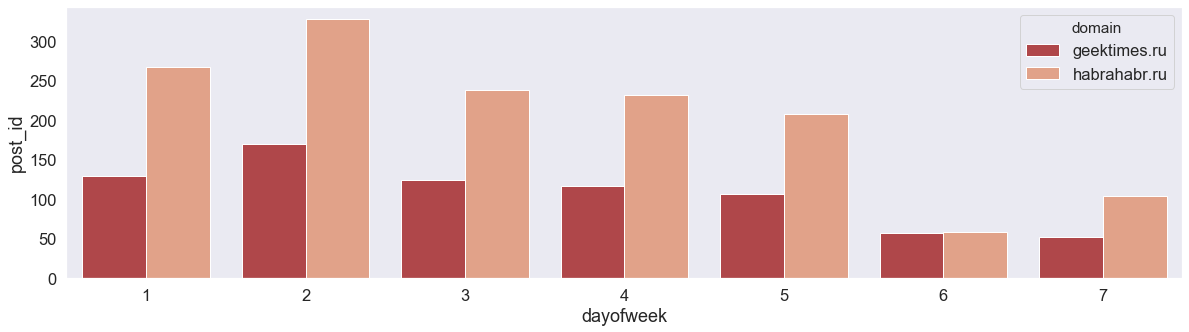

In [215]:
df_domain = df_post[(df_post['year'].isin(['2015'])) & (df_post['month'].isin(['3']))].groupby(['dayofweek', 'domain'], as_index=False)[['post_id']].count()
plt.figure(figsize=(20,5))
sns.barplot(x="dayofweek", y="post_id", hue='domain', data=df_domain)

## 3\. Когда лучше всего публиковать статью?

* Больше всего просмотров набирают статьи, опубликованные в 12 часов дня
* У опубликованных в 10 утра постов больше всего комментариев
* Больше всего просмотров набирают статьи, опубликованные в 6 часов утра
* Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера
* На хабре дневные статьи комментируют чаще, чем вечерние

In [156]:
df_12 = df.groupby(['hour'])[['views']].mean()

In [159]:
df.groupby(['hour'])[['views']].mean().idxmax()

views    6
dtype: int64

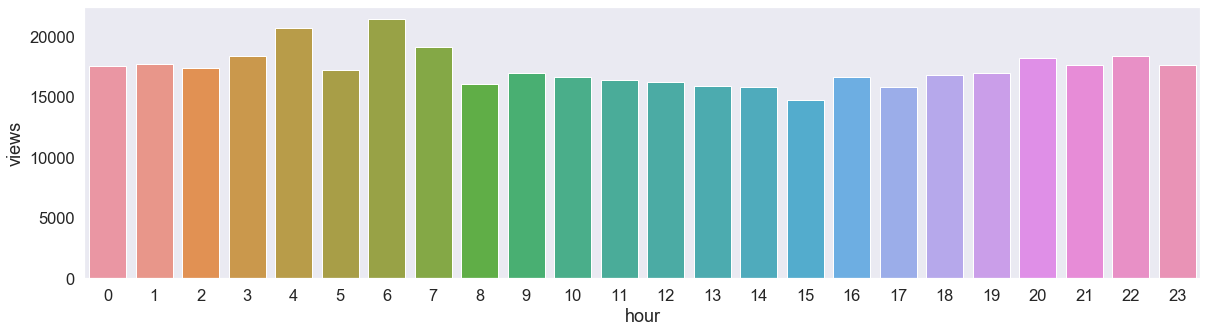

In [160]:
plt.figure(figsize=(20,5))
sns.barplot(x="hour", y="views", data=df_12.reset_index())

In [161]:
df_10 = df.groupby(['hour'])[['comments']].mean()

In [162]:
df.groupby(['hour'])[['comments']].mean().idxmax()

comments    4
dtype: int64

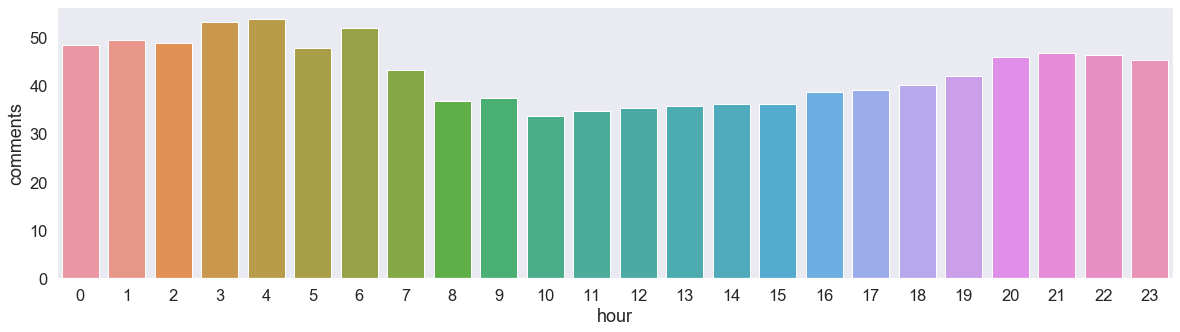

In [163]:
plt.figure(figsize=(20,5))
sns.barplot(x="hour", y="comments", data=df_10.reset_index())

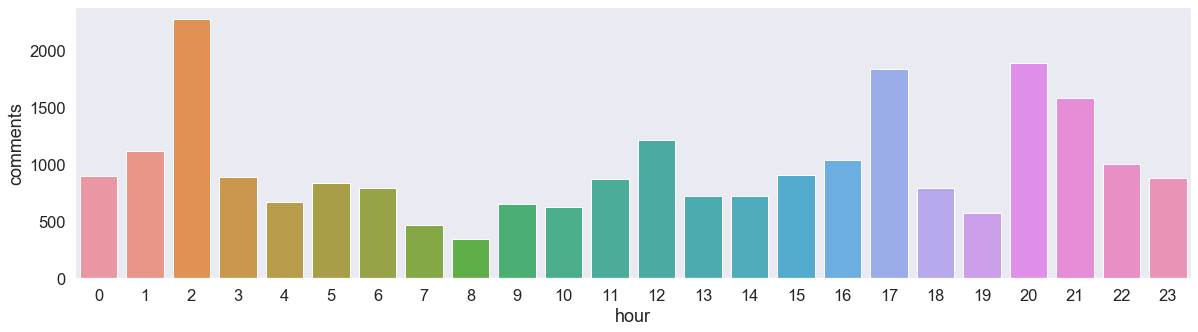

In [165]:
df_21 = df[df['domain'] == 'geektimes.ru'].groupby(['hour'])[['comments']].max()
plt.figure(figsize=(20,5))
sns.barplot(x="hour", y="comments", data=df_21.reset_index())

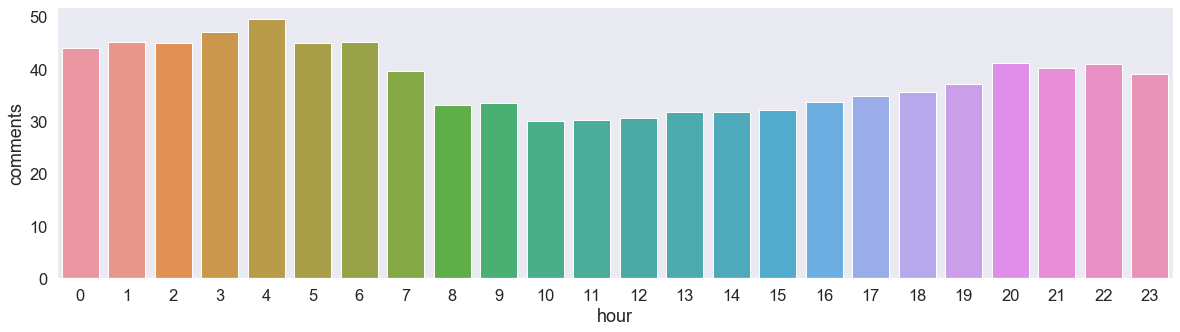

In [166]:
df_night = df[df['domain'] == 'habrahabr.ru'].groupby(['hour'])[['comments']].mean()
plt.figure(figsize=(20,5))
sns.barplot(x="hour", y="comments", data=df_night.reset_index())

## 4\. Кого из топ-20 авторов чаще всего минусуют?

* @Mordatyj
* @Mithgol
* @alizar
* @ilya42

In [193]:
df_top_minus = df.groupby('author', as_index=False) \
            .agg({'post_id' : 'count', 'votes_minus' : 'mean'}) \
            .nlargest(20, 'post_id')

In [194]:
df_top_minus.head()

,author,post_id,votes_minus
9434,@alizar,5292,7.928191
15851,@marks,4711,3.834997
6666,@SLY_G,1939,4.276947
14212,@ivansychev,1350,2.498519
18857,@semen_grinshtein,1171,1.167378


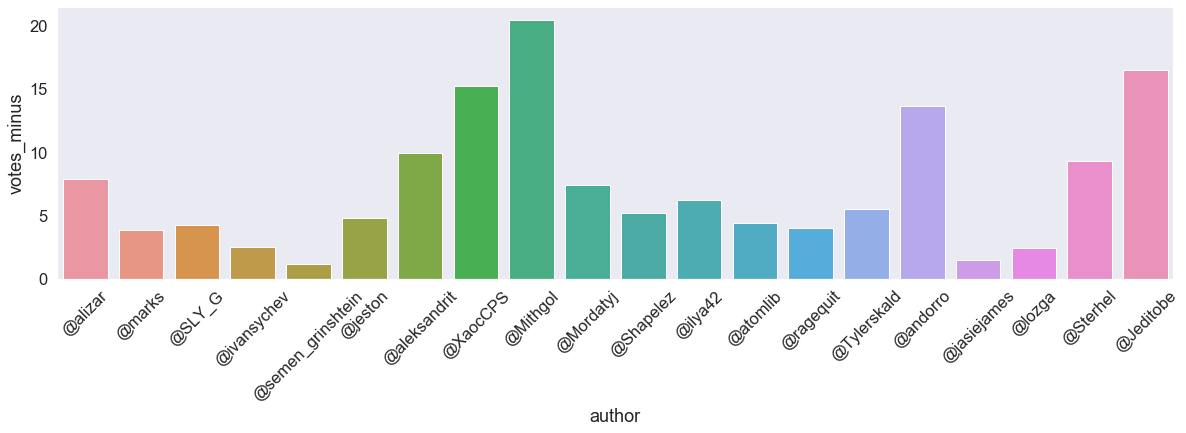

In [195]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
sns.barplot(x="author", y="votes_minus", data=df_top_minus)

## 5\. Сравните субботы и понедельники

Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером?

In [212]:
df_16 = df[(df['dayofweek'].isin((1, 6)))].groupby(['dayofweek','hour'], as_index=False)['post_id'].count()
df_16.head()

,dayofweek,hour,post_id
0,1,0,537
1,1,1,415
2,1,2,320
3,1,3,209
4,1,4,173


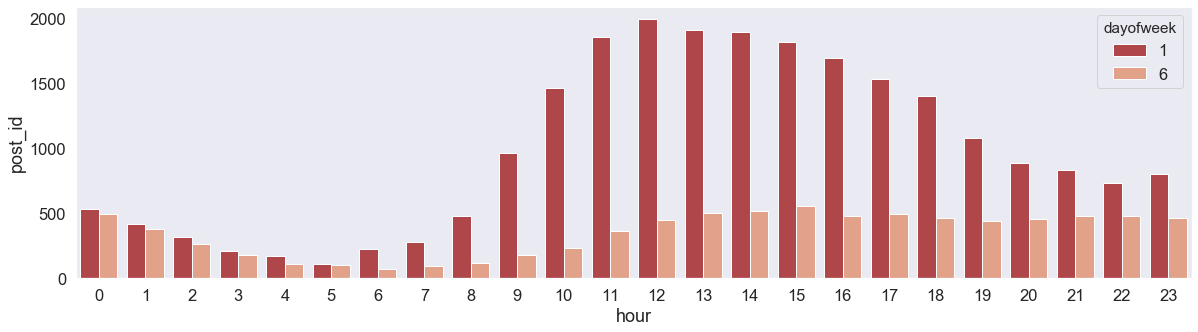

In [213]:
plt.figure(figsize=(20,5))
sns.barplot(x="hour", y="post_id", hue='dayofweek', data=df_16)